In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# some options for the visualization.  I haven't yet done something better than global vars
START_HOUR=4
TEXT_COLOR='peachpuff'

In [3]:
df_cols = ['start', 'duration', 'usage']
df = pd.read_csv('data/all.csv', names = df_cols)
df.tail(24)

,start,duration,usage
18190,1594944000,3600,95
18191,1594947600,3600,110
18192,1594951200,3600,110
18193,1594954800,3600,130
18194,1594958400,3600,155
18195,1594962000,3600,170
18196,1594965600,3600,155
18197,1594969200,3600,140
18198,1594972800,3600,210
18199,1594976400,3600,240


In [4]:
df['local_time'] = df['start'].apply(dt.datetime.utcfromtimestamp)
df['date'] = df['local_time'].apply(lambda lt: lt.date())
df['hour'] = df['local_time'].apply(lambda lt: lt.time().hour)
df.tail(30)

,start,duration,usage,local_time,date,hour
18184,1594922400,3600,395,2020-07-16 18:00:00,2020-07-16,18
18185,1594926000,3600,370,2020-07-16 19:00:00,2020-07-16,19
18186,1594929600,3600,630,2020-07-16 20:00:00,2020-07-16,20
18187,1594933200,3600,450,2020-07-16 21:00:00,2020-07-16,21
18188,1594936800,3600,485,2020-07-16 22:00:00,2020-07-16,22
18189,1594940400,3600,85,2020-07-16 23:00:00,2020-07-16,23
18190,1594944000,3600,95,2020-07-17 00:00:00,2020-07-17,0
18191,1594947600,3600,110,2020-07-17 01:00:00,2020-07-17,1
18192,1594951200,3600,110,2020-07-17 02:00:00,2020-07-17,2
18193,1594954800,3600,130,2020-07-17 03:00:00,2020-07-17,3


In [5]:
# We want to offset the visualization, so that each day runs e.g. 6am-6am
def adjust_for_start_hour(row):
    if row['hour'] < START_HOUR:
        display_date = row['date']-dt.timedelta(days=1)
    else:
        display_date = row['date']
    display_hour = (row['hour']-START_HOUR)%24
    return {"display_date": display_date, "display_hour": display_hour}

df.iloc[-22], adjust_for_start_hour(df.iloc[-22])

adjusted = df.apply(adjust_for_start_hour, axis=1, result_type='expand')
df = pd.concat([df, adjusted], axis=1)
df.tail(24)


,start,duration,usage,local_time,date,hour,display_date,display_hour
18190,1594944000,3600,95,2020-07-17 00:00:00,2020-07-17,0,2020-07-16,20
18191,1594947600,3600,110,2020-07-17 01:00:00,2020-07-17,1,2020-07-16,21
18192,1594951200,3600,110,2020-07-17 02:00:00,2020-07-17,2,2020-07-16,22
18193,1594954800,3600,130,2020-07-17 03:00:00,2020-07-17,3,2020-07-16,23
18194,1594958400,3600,155,2020-07-17 04:00:00,2020-07-17,4,2020-07-17,0
18195,1594962000,3600,170,2020-07-17 05:00:00,2020-07-17,5,2020-07-17,1
18196,1594965600,3600,155,2020-07-17 06:00:00,2020-07-17,6,2020-07-17,2
18197,1594969200,3600,140,2020-07-17 07:00:00,2020-07-17,7,2020-07-17,3
18198,1594972800,3600,210,2020-07-17 08:00:00,2020-07-17,8,2020-07-17,4
18199,1594976400,3600,240,2020-07-17 09:00:00,2020-07-17,9,2020-07-17,5


In [6]:
# Generate the 2-d map of date x hour that will be plotted
def get_2dhourly_by_yr(df, yr):
    hourly = df[df['display_date'].apply(lambda d: d.year==yr)]
    hourly_2d = hourly.set_index(['display_date', 'display_hour'])['usage'].unstack(level=-1)
    return hourly_2d
    
get_2dhourly_by_yr(df, 2020).describe()

display_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,198.00000,198.000000,197.000000,198.000000
mean,167.537688,147.060302,137.437186,142.638191,156.331658,184.095477,201.884422,230.175879,261.457286,270.804020,...,375.251256,450.603015,441.834171,435.653266,418.165829,378.140704,319.79798,280.681818,233.045685,198.863636
std,104.737369,91.498614,84.636566,79.551773,78.724751,126.451915,134.836570,213.223443,243.329466,261.616202,...,344.273774,382.170024,356.940956,313.102470,286.563191,244.112617,154.73232,149.181914,150.273095,134.186198
min,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,30.000000,35.000000,30.000000,30.000000,...,30.000000,30.000000,35.000000,35.000000,50.000000,45.000000,45.00000,40.000000,35.000000,40.000000
25%,85.000000,65.000000,70.000000,80.000000,95.000000,100.000000,110.000000,100.000000,105.000000,100.000000,...,185.000000,230.000000,260.000000,272.500000,275.000000,260.000000,210.00000,155.000000,105.000000,95.000000
50%,150.000000,130.000000,115.000000,125.000000,150.000000,170.000000,185.000000,185.000000,200.000000,210.000000,...,335.000000,380.000000,380.000000,390.000000,380.000000,365.000000,330.00000,277.500000,205.000000,175.000000
75%,215.000000,202.500000,190.000000,192.500000,207.500000,235.000000,265.000000,290.000000,337.500000,350.000000,...,445.000000,490.000000,505.000000,500.000000,470.000000,437.500000,403.75000,385.000000,335.000000,285.000000
max,495.000000,505.000000,680.000000,455.000000,450.000000,1180.000000,860.000000,1940.000000,2185.000000,2005.000000,...,2625.000000,2220.000000,2720.000000,2465.000000,2515.000000,2270.000000,1000.00000,785.000000,830.000000,865.000000


In [7]:
# Some conveniences for plotting
def annotate_event(ax, label, event_dt, fontsize=16, color=TEXT_COLOR):
    days = (event_dt-dt.date(event_dt.year,1,1)).days # days since Jan 1
    y = days+.3
    x = 10-START_HOUR # annotations look nice aligned near 10am
    ax.annotate(label, color=color, xy=(x, y), fontsize=fontsize)

ticklabels_by_start_hour = {
    0: ([0, 6, 12, 18], ['midnight', '6am', 'noon', '6pm']),
    6: ([0, 6, 12, 18], ['6am', 'noon', '6pm', 'midnight']),
    4: ([0, 4, 8, 12, 16, 20], ['4am', '8am', 'noon', '4pm', '8pm', 'midnight'])
}

# 2020-specific stuff
def annotate_yr(ax, yr):
    if yr==2020:
        annotate_event(ax, 'Seattle trip', dt.date(2020, 1, 3))
        annotate_event(ax, 'Bay Area trip', dt.date(2020, 2, 4))
        annotate_event(ax, 'Cactus League trip', dt.date(2020, 2, 28))
        annotate_event(ax, 'San Francisco trip', dt.date(2020, 7, 4))
        annotate_event(ax, 'WFH begins', dt.date(2020, 3, 11), fontsize=28)
        ax.annotate('Missing data point', xy=(21.5, 66), xytext=(15.5, 64.5), fontsize='10', color=TEXT_COLOR, arrowprops=dict(width=1, headwidth=5, headlength=4, color=TEXT_COLOR))


ticklabels_by_start_hour[START_HOUR]

([0, 4, 8, 12, 16, 20], ['4am', '8am', 'noon', '4pm', '8pm', 'midnight'])

In [8]:
def get_yticks(hourly):
    first = hourly.index[0].date()
    for d in hourly.index:
        if d.day==1 or d.date()==first:
            index = (d.date()-first).days
            label = d.strftime('%b %d')
            yield(index, label)

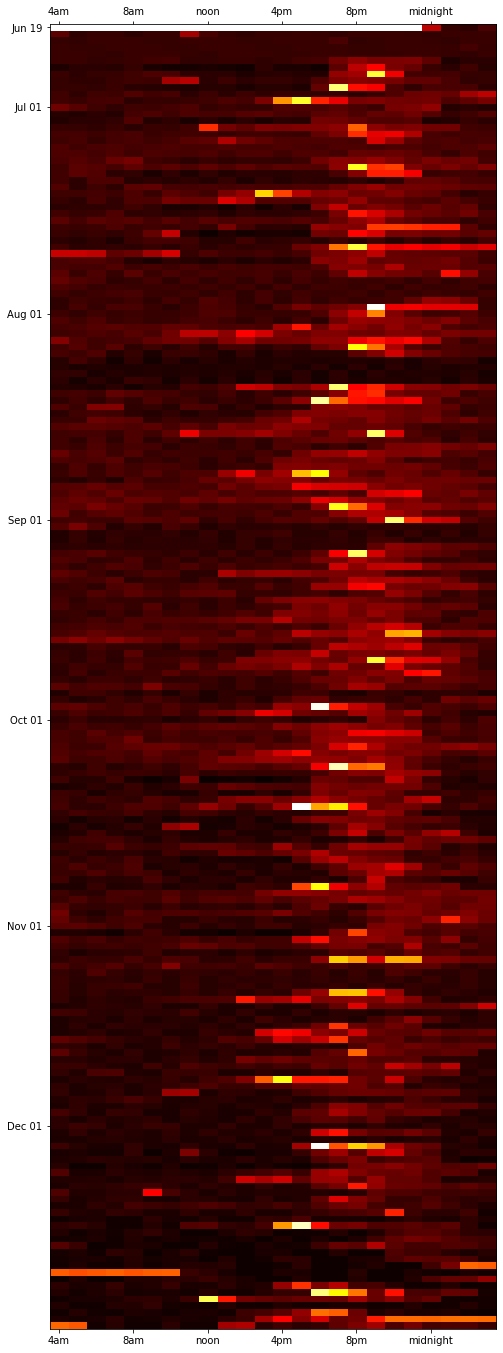

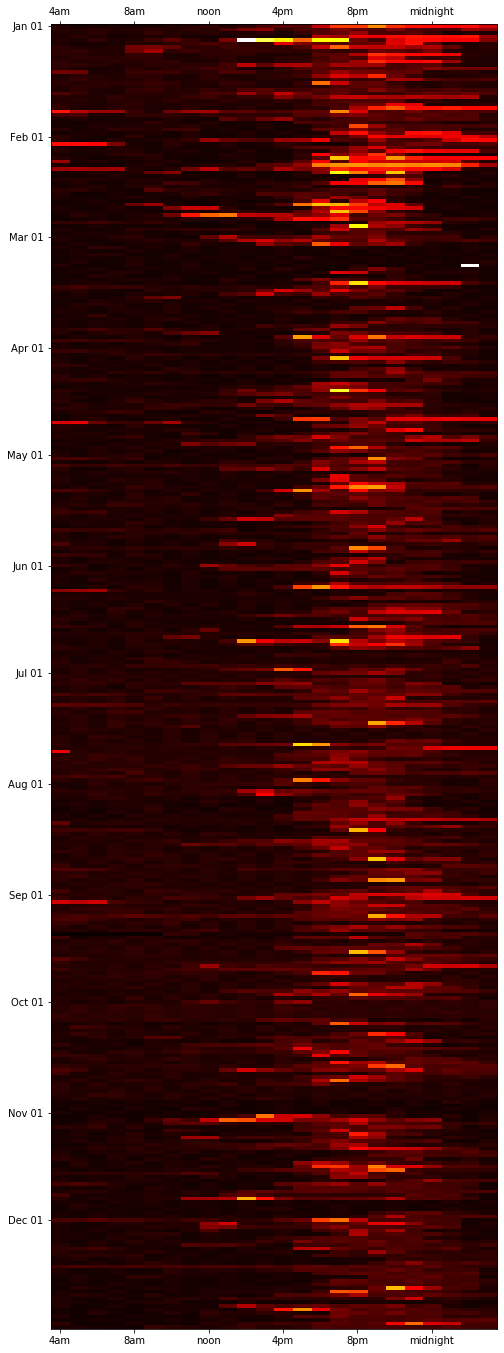

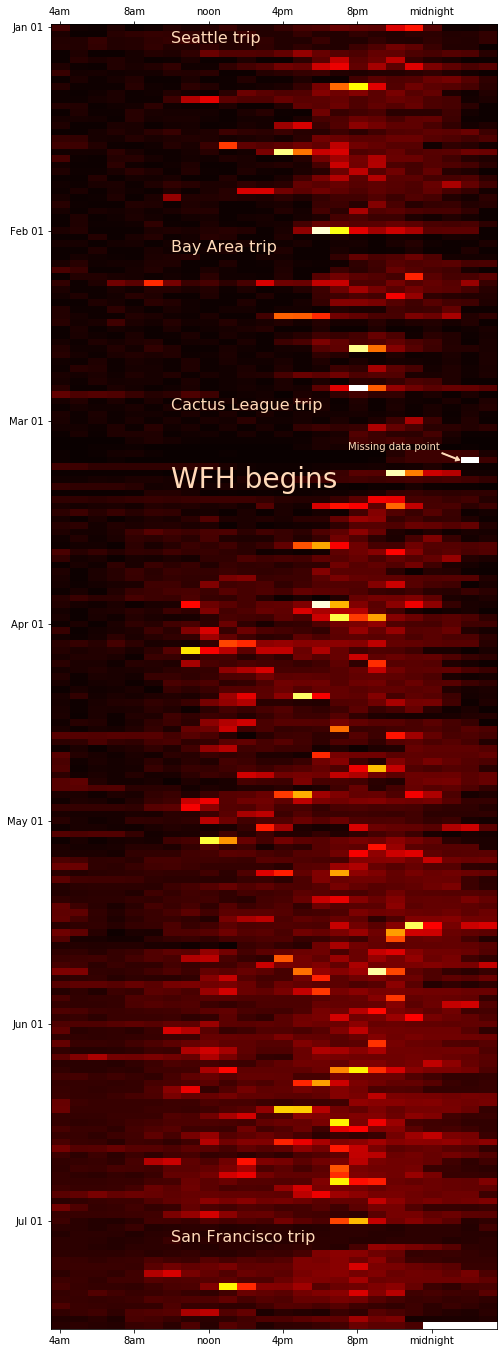

In [9]:
# Plot the figure

for yr in [2018, 2019, 2020]:
    hourly_2d=get_2dhourly_by_yr(df, yr)

    fig, ax = plt.subplots(figsize=(8, 24))
    (xticks, xlabels) = ticklabels_by_start_hour[START_HOUR]
    (yticks, ylabels) = tuple(zip(*get_yticks(hourly_2d)))
    plt.xticks(ticks=xticks, labels=xlabels)
    plt.yticks(ticks=yticks, labels=ylabels)
    ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

    ax.imshow(hourly_2d, aspect='auto', interpolation='nearest', cmap='hot')
    annotate_yr(ax, yr)
    for fmt in ['svg', 'png']:
        plt.savefig(f'data/output_images/electricity_heatmap_{yr}.{fmt}', transparent=False, bbox_inches='tight')
    plt.show()

